In [75]:
import pandas as pd
import numpy as np
import json
import os
import ast
# os.chdir('yelp_dataset/')
import nltk

#viz
import matplotlib.pyplot as plt 

In [76]:
with open('yelp_academic_dataset_business.json', 'r', encoding="utf8") as f:
    data = f.readlines()

In [11]:
#dff1 = data[:100000]

In [77]:
dff2 = map(lambda x: x.rstrip(), data)

data_json_str = "[" + ','.join(dff2) + "]"

data_df = pd.read_json(data_json_str)
data_df

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state
0,1314 44 Avenue NE,"{'BikeParking': 'False', 'BusinessAcceptsCredi...",Apn5Q_b6Nz61Tq4XzPdf9A,"Tours, Breweries, Pizza, Restaurants, Food, Ho...",Calgary,"{'Monday': '8:30-17:0', 'Tuesday': '11:0-21:0'...",1,51.091813,-114.031675,Minhas Micro Brewery,,T2E 6L6,24,4.0,AB
1,,"{'Alcohol': 'none', 'BikeParking': 'False', 'B...",AjEbIBw6ZFfln7ePHha9PA,"Chicken Wings, Burgers, Caterers, Street Vendo...",Henderson,"{'Friday': '17:0-23:0', 'Saturday': '17:0-23:0...",0,35.960734,-114.939821,CK'S BBQ & Catering,,89002,3,4.5,NV
2,1335 rue Beaubien E,"{'Alcohol': 'beer_and_wine', 'Ambience': '{'ro...",O8S5hYJ1SMc8fA4QBtVujA,"Breakfast & Brunch, Restaurants, French, Sandw...",Montréal,"{'Monday': '10:0-22:0', 'Tuesday': '10:0-22:0'...",0,45.540503,-73.599300,La Bastringue,Rosemont-La Petite-Patrie,H2G 1K7,5,4.0,QC
3,211 W Monroe St,None,bFzdJJ3wp3PZssNEsyU23g,"Insurance, Financial Services",Phoenix,None,1,33.449999,-112.076979,Geico Insurance,,85003,8,1.5,AZ
4,2005 Alyth Place SE,{'BusinessAcceptsCreditCards': 'True'},8USyCYqpScwiNEb58Bt6CA,"Home & Garden, Nurseries & Gardening, Shopping...",Calgary,"{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ...",1,51.035591,-114.027366,Action Engine,,T2H 0N5,4,2.0,AB
5,"20235 N Cave Creek Rd, Ste 1115","{'BikeParking': 'True', 'BusinessAcceptsCredit...",45bWSZtniwPRiqlivpS8Og,"Coffee & Tea, Food",Phoenix,"{'Monday': '5:30-20:0', 'Tuesday': '5:30-20:0'...",1,33.671375,-112.030017,The Coffee Bean & Tea Leaf,,85024,63,4.0,AZ
6,631 Bloor St W,"{'BusinessParking': '{'garage': False, 'street...",9A2quhZLyWk0akUetBd8hQ,"Food, Bakeries",Toronto,None,0,43.664378,-79.414424,Bnc Cake House,Koreatown,M6G 1K8,7,4.0,ON
7,"3417 Derry Road E, Unit 103","{'Alcohol': 'none', 'BusinessAcceptsCreditCard...",6OuOZAok8ikONMS_T3EzXg,"Restaurants, Thai",Mississauga,None,1,43.712946,-79.632763,Thai One On,Ridgewood,L4T 1A8,7,2.0,ON
8,1440 N. Dysart Ave,"{'Alcohol': 'none', 'Ambience': '{'romantic': ...",8-NRKkPY1UiFXW20WXKiXg,"Mexican, Restaurants",Avondale,"{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...",1,33.448106,-112.341302,Filiberto's Mexican Food,,85323,40,2.5,AZ
9,209 Oakland Ave,"{'BikeParking': 'True', 'BusinessAcceptsCredit...",UTm5QZThPQlT35mkAcGOjg,"Flowers & Gifts, Gift Shops, Shopping",Pittsburgh,"{'Monday': '9:0-18:0', 'Tuesday': '9:0-18:0', ...",1,40.441421,-79.956457,Maggie & Stella's Gifts,Oakland,15213,3,3.5,PA


In [13]:
#dff = data_df.head(100000)
#dff

(45.3017, 45.7017)

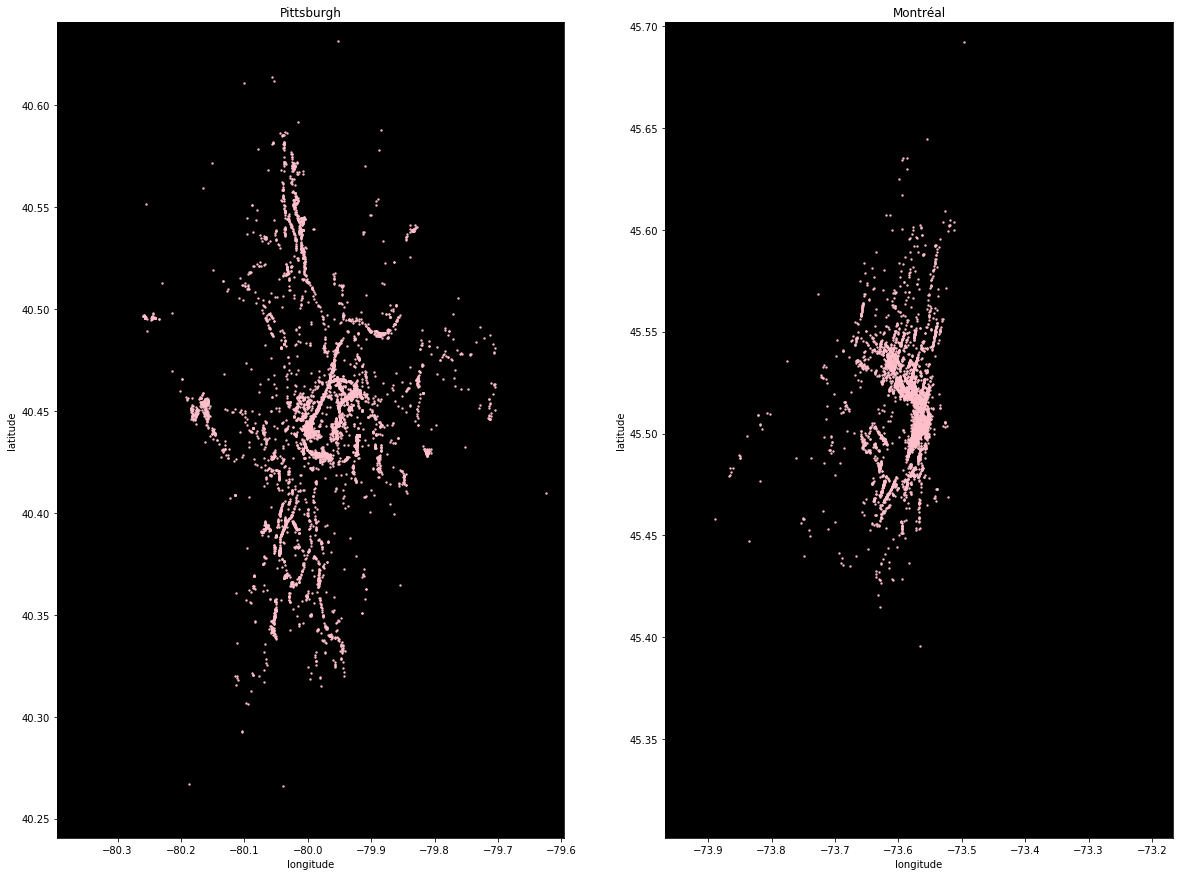

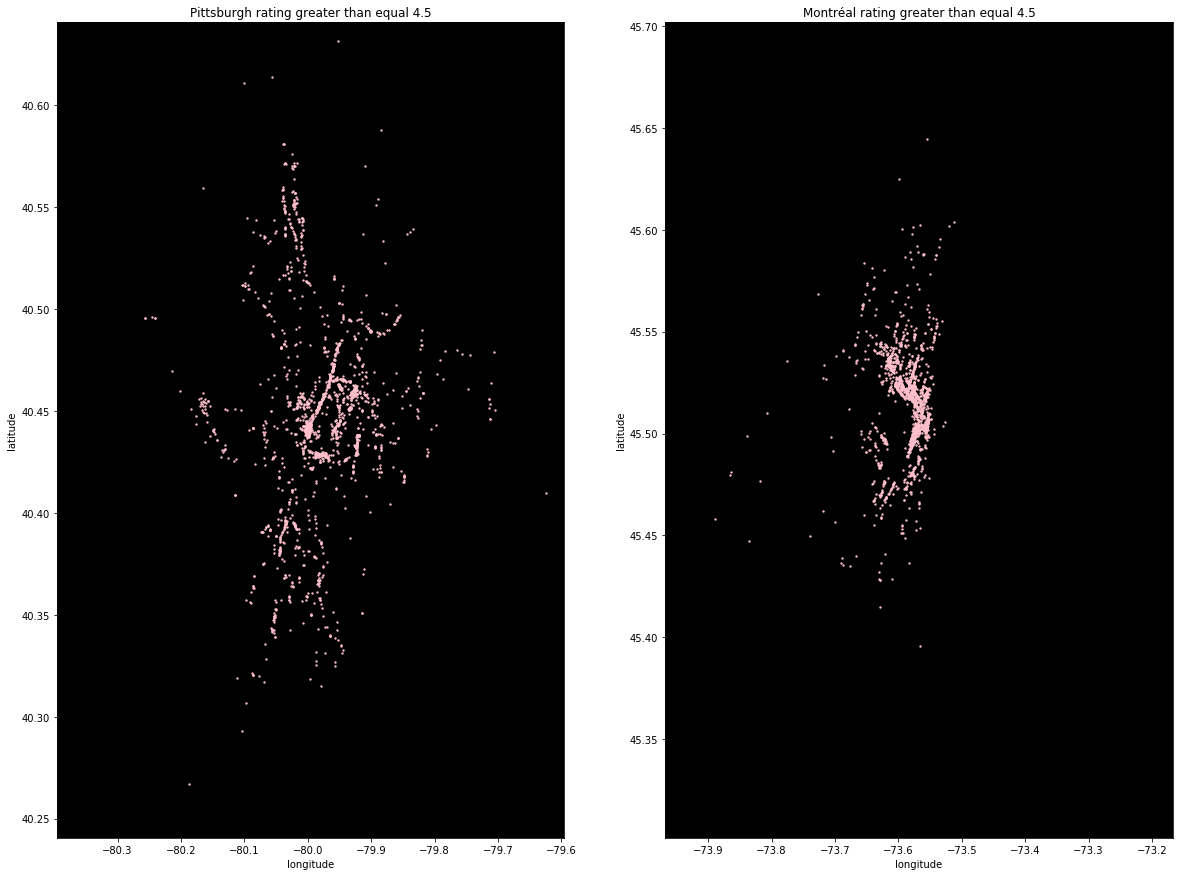

In [95]:
city_business_data = data_df[['latitude','longitude','stars','review_count','city']]

city_business_data
city_Montreal=city_business_data[(city_business_data["city"] == 'Montréal')]
city_Pittsburgh=city_business_data[(city_business_data["city"] == 'Pittsburgh')]

#finding businesss with ratings equal or more than 4.5 .
rating= 4.5
city_Montreal_rating = city_Montreal[(city_Montreal["stars"]>= rating)]

city_Pittsburgh_rating = city_Pittsburgh[(city_Pittsburgh["stars"]>=rating)]

#longitude and latitude from google maps. 
lat_pitts = 40.4406
lon_pitts = -79.9959

lat_mont = 45.5017
lon_mont = -73.5673

#x-axis
lon_min_pitts, lon_max_pitts = lon_pitts-0.4,lon_pitts+0.4
#y-axis
lat_min_pitts, lat_max_pitts = lat_pitts-0.2,lat_pitts+0.2

#x-axis
lon_min_mont, lon_max_mont = lon_mont-0.4,lon_mont+0.4
#y-axis
lat_min_mont, lat_max_mont = lat_mont-0.2,lat_mont+0.2

#If We want to view table uncomment the below input
#print (city_Pittsburgh, city_Montreal)

f, (plt1, plt2) = plt.subplots(1, 2, figsize=(20,15))
#plot pheonix
city_Pittsburgh.plot(kind='scatter', x='longitude', y='latitude',
                color='pink', ax=plt1, s=2, alpha=.9, subplots=True)
plt1.set_title("Pittsburgh")
plt1.set_facecolor('black')
plt1.set_xlim([lon_min_pitts, lon_max_pitts])
plt1.set_ylim([lat_min_pitts, lat_max_pitts])

#Montreal plot
city_Montreal.plot(kind='scatter', x='longitude', y='latitude',
                color='pink', ax=plt2, s=2, alpha=.9, subplots=True)
plt2.set_title("Montréal")
plt2.set_facecolor('black')
plt2.set_xlim([lon_min_mont, lon_max_mont])
plt2.set_ylim([lat_min_mont, lat_max_mont])

#Ratings greater than 3. 

f, (plt_rating_1, plt_rating_2) = plt.subplots(1, 2, figsize=(20,15))
#plot pheonix
city_Pittsburgh_rating.plot(kind='scatter', x='longitude', y='latitude',
                color='pink', ax=plt_rating_1, s=2, alpha=.9, subplots=True)
plt_rating_1.set_title("Pittsburgh rating greater than equal 4.5")
plt_rating_1.set_facecolor('black')
plt_rating_1.set_xlim([lon_min_pitts, lon_max_pitts])
plt_rating_1.set_ylim([lat_min_pitts, lat_max_pitts])

#Montreal plot
city_Montreal_rating.plot(kind='scatter', x='longitude', y='latitude',
                color='pink', ax=plt_rating_2, s=2, alpha=.9, subplots=True)
plt_rating_2.set_title("Montréal rating greater than equal 4.5")
plt_rating_2.set_facecolor('black')
plt_rating_2.set_xlim([lon_min_mont, lon_max_mont])
plt_rating_2.set_ylim([lat_min_mont, lat_max_mont])



Data is more concentrated in montrel. Interesting to know the resturants are restriced a smaller area even though montreal is more than three times the size. 